<a href="https://colab.research.google.com/github/rizkamars/Customer-Churn-Prediction/blob/main/CustomerChurnDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer churn mengacu pada fenomena di mana pelanggan menghentikan hubungan atau langganan mereka dengan suatu perusahaan atau penyedia layanan. Ini menunjukkan tingkat di mana pelanggan berhenti menggunakan produk atau layanan perusahaan dalam periode waktu tertentu. Churn merupakan metrik penting bagi bisnis karena secara langsung berdampak pada pendapatan, pertumbuhan, dan retensi pelanggan.

Dalam konteks dataset Churn, label churn menunjukkan apakah seorang pelanggan telah berhenti (churn) atau tidak. **Pelanggan yang churn adalah mereka yang memutuskan untuk menghentikan langganan atau penggunaan layanan perusahaan. Sebaliknya, pelanggan yang tidak churn adalah mereka yang tetap terlibat dan mempertahankan hubungannya dengan perusahaan.**

Memahami customer churn sangat penting bagi bisnis untuk mengidentifikasi pola, faktor, dan indikator yang menyebabkan pelanggan berhenti. Dengan menganalisis perilaku churn dan fitur-fitur yang terkait, perusahaan dapat mengembangkan strategi untuk mempertahankan pelanggan yang ada, meningkatkan kepuasan pelanggan, dan mengurangi tingkat kehilangan pelanggan. Teknik pemodelan prediktif juga dapat diterapkan untuk memprediksi dan menangani churn secara proaktif, sehingga perusahaan dapat mengambil langkah-langkah antisipatif untuk mempertahankan pelanggan yang berisiko churn.

# API KAGGLE

In [ ]:
!pip install -q kaggle seaborn xgboost

In [ ]:
from google.colab import files
files.upload()  # Upload file kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizkamarssalsabila","key":"e7fd6907fa79a3932d8c6e28fd27a882"}'}

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# IMPORT DATASET

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Perbaiki permission
!chmod 600 /content/kaggle.json

# Unduh dataset
!kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
License(s): GPL-2.0
  0% 0.00/6.66M [00:00<?, ?B/s]
100% 6.66M/6.66M [00:00<00:00, 722MB/s]


In [ ]:
# Dataset berisikan training dan testing dalam satu file

df_train = pd.read_csv("/content/customer_churn_dataset-training-master.csv")
df_test = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")
print(df_train.shape, df_test.shape)

(440833, 12) (64374, 12)


In [ ]:
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df_all = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

# INSPECTING DATA

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
df_train.describe()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440833.000000,440832.000000,440832.000000,440832.000000,440832.000000,440833.000000,440833.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,0.567684,31.256336,15.807494,3.604437,12.965722,1.013847,0.998489,631.616223,14.480868,0.567107
std,129531.918550,12.442369,0.495403,17.255727,8.586242,3.070218,8.258063,0.813972,0.895777,240.803001,8.596208,0.495477
min,2.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,0.000000,16.000000,9.000000,1.000000,6.000000,0.000000,0.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,1.000000,32.000000,16.000000,3.000000,12.000000,1.000000,1.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,1.000000,46.000000,23.000000,6.000000,19.000000,2.000000,2.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,2.000000,60.000000,30.000000,10.000000,30.000000,3.000000,3.000000,1000.000000,30.000000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Subscription Type', 'Contract Length']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    label_encoders[col] = le

df_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


In [ ]:
print(df_all.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


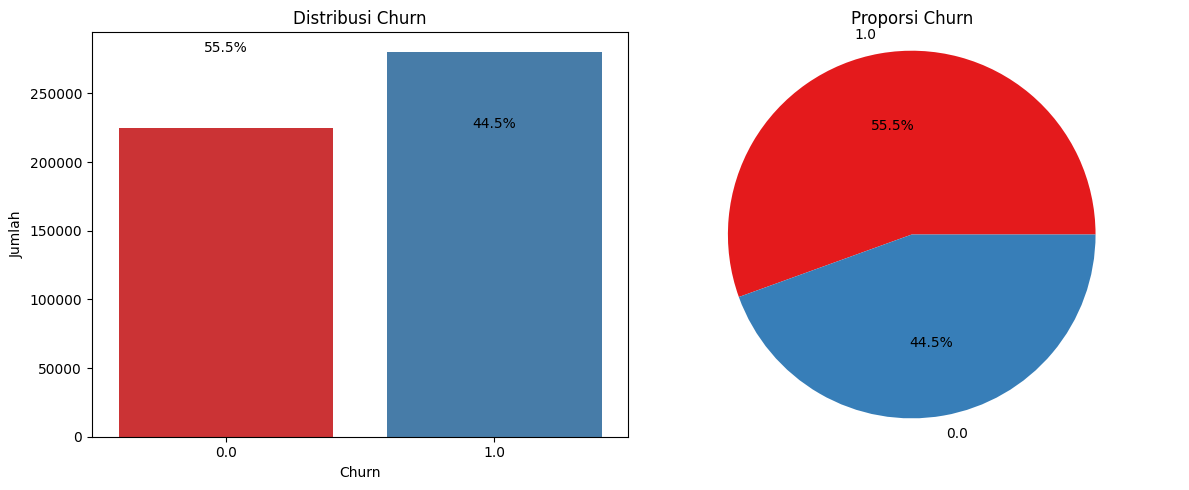

In [ ]:
churn_df = count_churn.reset_index()
churn_df.columns = ['Churn', 'Jumlah']
churn_df['Proporsi'] = prop_churn.values

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=churn_df, x='Churn', y='Jumlah', hue='Churn', palette='Set1', ax=axs[0], legend=False)
axs[0].set_title('Distribusi Churn')
axs[0].set_xlabel('Churn')
axs[0].set_ylabel('Jumlah')
for i, row in churn_df.iterrows():
    axs[0].text(i, row['Jumlah'] + 1, f'{row["Proporsi"]:.1f}%', ha='center')

axs[1].pie(churn_df['Jumlah'], labels=churn_df['Churn'], autopct='%1.1f%%',
           colors=sns.color_palette('Set1'))
axs[1].set_title('Proporsi Churn')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

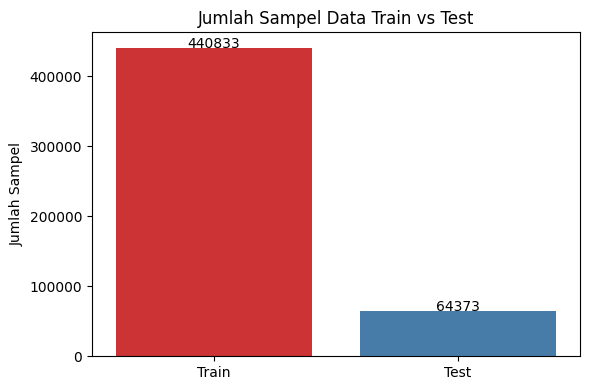

In [ ]:
train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6,4))
sns.barplot(x=['Train', 'Test'], y=[train_size, test_size], palette='Set1')
plt.title('Jumlah Sampel Data Train vs Test')
plt.ylabel('Jumlah Sampel')
for i, val in enumerate([train_size, test_size]):
    plt.text(i, val + 5, str(val), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# EXPLANATORY DATA ANALYSIS

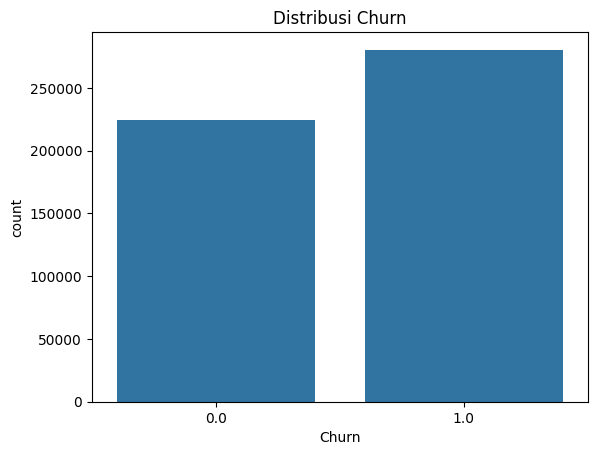

In [ ]:
sns.countplot(x=df_all['Churn'])
plt.title('Distribusi Churn')
plt.show()

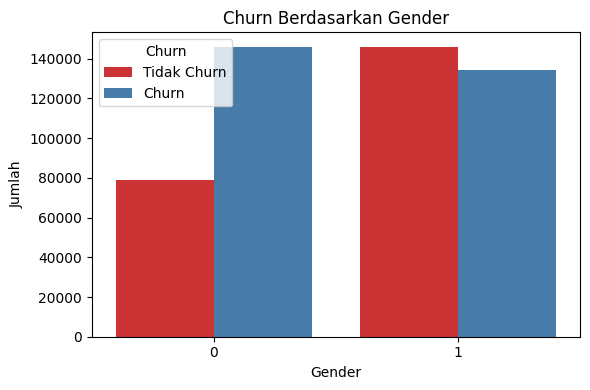

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_all, x='Gender', hue='Churn', palette='Set1')
plt.title('Churn Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.tight_layout()
plt.show()

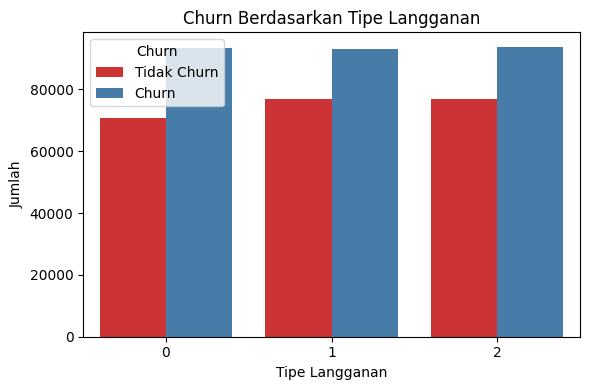

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_all, x='Subscription Type', hue='Churn', palette='Set1')
plt.title('Churn Berdasarkan Tipe Langganan')
plt.xlabel('Tipe Langganan')
plt.ylabel('Jumlah')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.tight_layout()
plt.show()

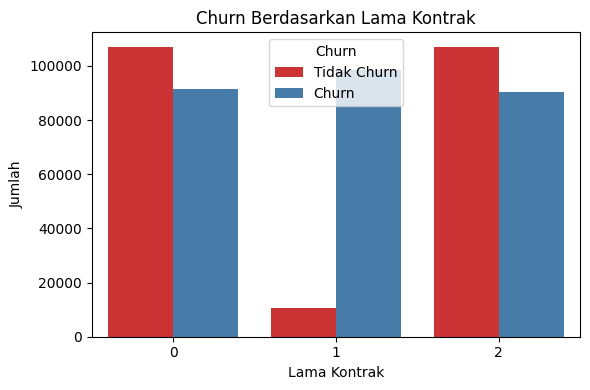

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_all, x='Contract Length', hue='Churn', palette='Set1')
plt.title('Churn Berdasarkan Lama Kontrak')
plt.xlabel('Lama Kontrak')
plt.ylabel('Jumlah')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.tight_layout()
plt.show()

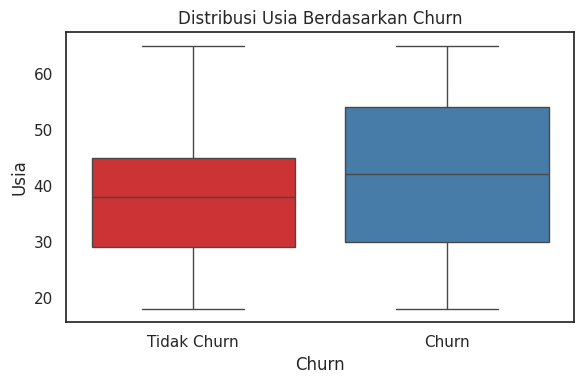

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Age', data=df_all, palette='Set1')
plt.title('Distribusi Usia Berdasarkan Churn')
plt.xlabel('Churn')
plt.ylabel('Usia')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.tight_layout()
plt.show()

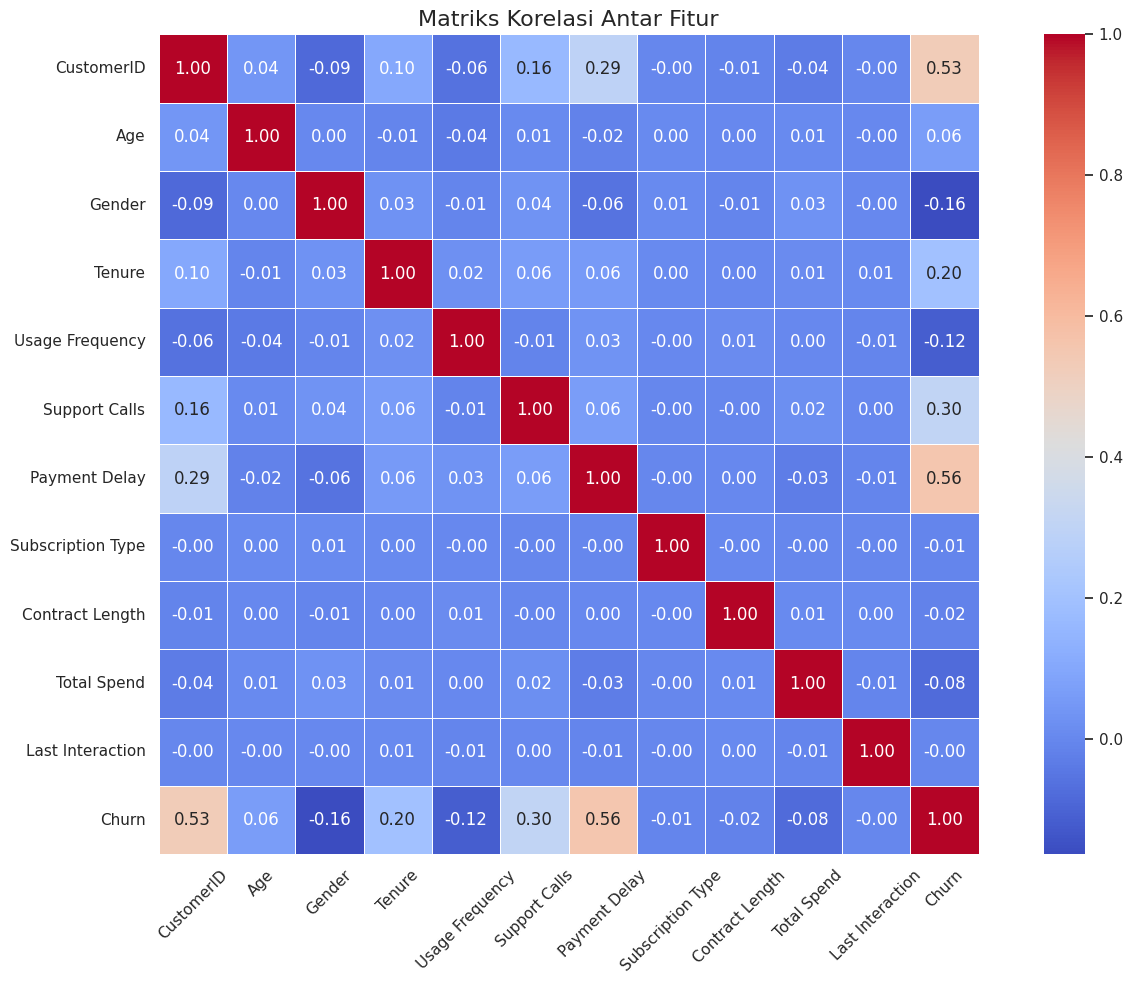

In [ ]:
correlation_matrix = df_test.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# PREPROCESSING

In [ ]:
df_all = df_all.dropna()

In [ ]:
print(df_all.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
df_all.to_csv('cleaned_customer_churn.csv', index=False)

In [ ]:
df_train_cleaned = df_all.iloc[:len(df_train)].copy()
df_test_cleaned = df_all.iloc[len(df_train):].copy()

In [ ]:
X_train = df_train_cleaned.drop(columns=['CustomerID', 'Churn'])
y_train = df_train_cleaned['Churn']
X_test = df_test_cleaned.drop(columns=['CustomerID', 'Churn'])
y_test = df_test_cleaned['Churn']

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODELING

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(class_weight='balanced', random_state=42)
}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc
    })

results_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False).reset_index(drop=True)
print("\nHasil Evaluasi Model:")
print(results_df.round(4))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Hasil Evaluasi Model:
                 Model  Accuracy  Precision  Recall  F1 Score     AUC
0  Logistic Regression    0.6010     0.5439  0.9766    0.6987  0.7748
1          Naive Bayes    0.5727     0.5260  0.9924    0.6875  0.7333
2    Gradient Boosting    0.5063     0.4896  0.9983    0.6570  0.6982
3          Extra Trees    0.5090     0.4910  0.9981    0.6582  0.6630
4              XGBoost    0.5034     0.4882  0.9987    0.6558  0.6498
5        Decision Tree    0.5539     0.5150  0.9960    0.6790  0.5762
6        Random Forest    0.5034     0.4882  0.9987    0.6558  0.5742


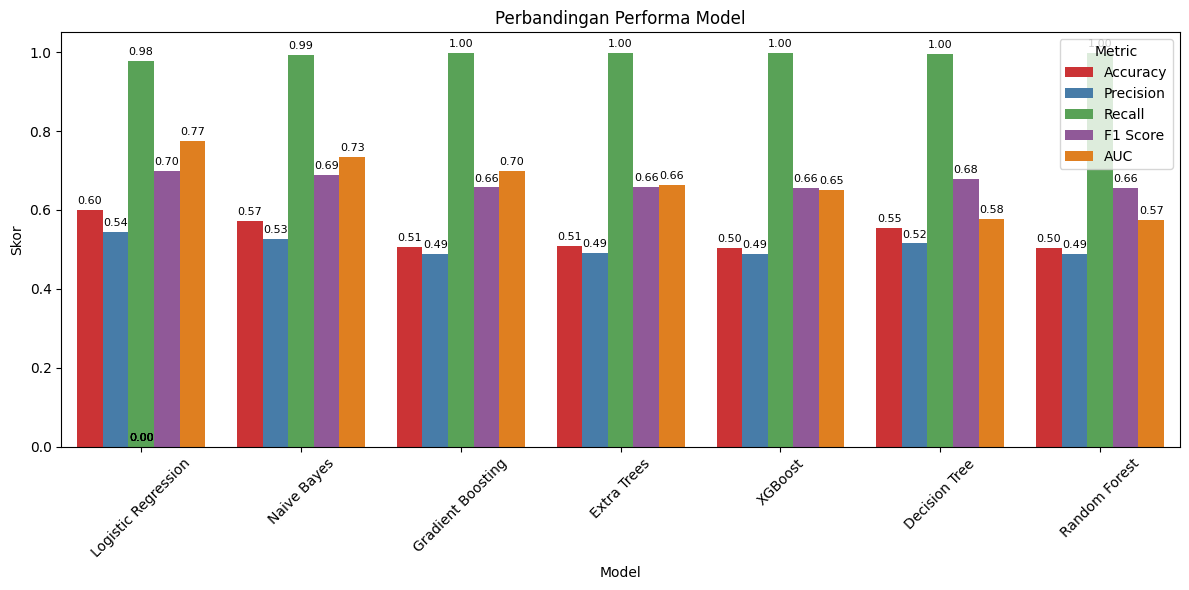

In [ ]:
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=results_long, x='Model', y='Value', hue='Metric', palette='Set1')

plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.legend(title='Metric')
plt.tight_layout()

for p in ax.patches:
    value = p.get_height()
    if not np.isnan(value):
        ax.text(p.get_x() + p.get_width() / 2, value + 0.01, f'{value:.2f}',
                ha='center', va='bottom', fontsize=8, color='black')

plt.show()

In [ ]:
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

feature_names = X_train.columns
coefficients = logreg_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
top_n = 10
print(coef_df.head(top_n)[['Feature', 'Coefficient']])

             Feature  Coefficient
4      Support Calls     2.124219
8        Total Spend    -1.335089
5      Payment Delay     0.852361
1             Gender    -0.525933
9   Last Interaction     0.477285
0                Age     0.411938
2             Tenure    -0.119676
3    Usage Frequency    -0.112697
6  Subscription Type    -0.043353
7    Contract Length    -0.002116


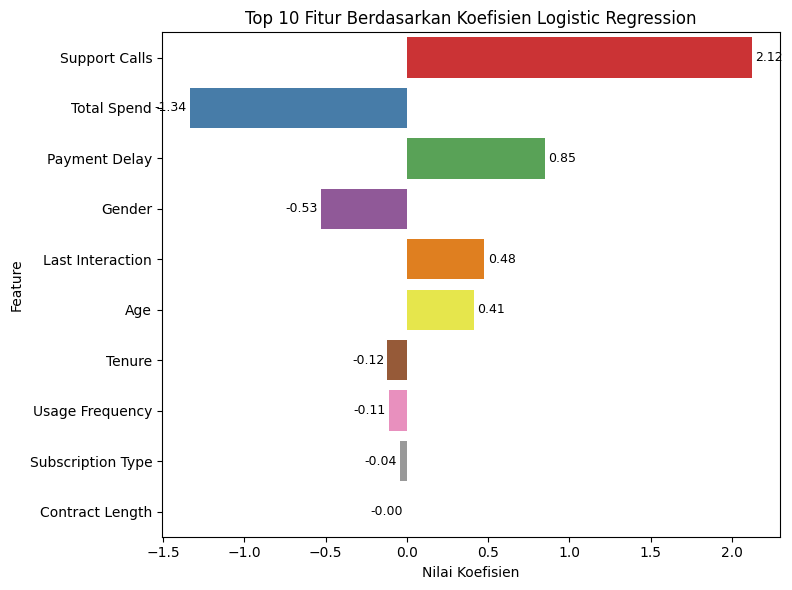

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=coef_df.head(top_n), x='Coefficient', y='Feature', palette='Set1')

plt.title(f'Top {top_n} Fitur Berdasarkan Koefisien Logistic Regression')
plt.xlabel('Nilai Koefisien')
plt.tight_layout()

for i, bar in enumerate(ax.patches):
    value = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(value + 0.02 * np.sign(value), y, f'{value:.2f}',
            va='center', ha='left' if value > 0 else 'right', fontsize=9)

plt.show()

# INSIGHT

| Fitur                 | Koefisien  | Interpretasi                                                                                                                                 |
| --------------------- | ---------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **Support Calls**     | **+2.12**  | Peningkatan jumlah panggilan ke pusat bantuan secara signifikan **meningkatkan kemungkinan churn**. Ini menunjukkan ketidakpuasan pelanggan. |
| **Total Spend**       | **−1.34**  | Pelanggan yang menghabiskan lebih banyak uang memiliki **kemungkinan churn lebih rendah** – mereka cenderung loyal.                          |
| **Payment Delay**     | **+0.85**  | Keterlambatan pembayaran **meningkatkan risiko churn**, bisa disebabkan ketidakpuasan atau kendala pembayaran.                               |
| **Gender**            | **−0.52**  | Pria (direpresentasikan dengan 1) cenderung **lebih kecil kemungkinannya untuk churn** dibanding wanita.                            |
| **Last Interaction**  | **+0.48**  | Semakin lama waktu sejak interaksi terakhir, **semakin besar kemungkinan churn** – menunjukkan disengagement.                                |
| **Age**               | **+0.41**  | Usia yang lebih tua **sedikit meningkatkan kemungkinan churn**, bisa terjadi karena perbedaan preferensi layanan.                                 |
| **Tenure**            | **−0.12**  | Pelanggan yang sudah lama bergabung **lebih kecil kemungkinan churn** – menunjukkan efek loyalitas.                                          |
| **Usage Frequency**   | **−0.11**  | Pelanggan yang lebih sering menggunakan layanan **lebih cenderung bertahan**.                                                                |
| **Subscription Type** | **−0.04**  | Tipe langganan memiliki pengaruh kecil terhadap churn, bisa jadi karena nilai manfaat relatif serupa.                                        |
| **Contract Length**   | **−0.002** | Hampir tidak berpengaruh terhadap churn.                                                                                                     |


Untuk mengurangi churn, perusahaan dapat meningkatkan layanan pelanggan, khususnya bagi mereka yang sering menghubungi support. Selain itu, dorong keterlibatan dengan promo, program loyalitas, dan fitur tambahan. Minimalkan keterlambatan pembayaran melalui pengingat otomatis dan opsi pembayaran fleksibel. Jaga keterlibatan dengan kampanye rutin, serta lakukan segmentasi berdasarkan usia dan gender agar strategi pemasaran lebih tepat sasaran. Pendekatan ini membantu meningkatkan retensi pelanggan secara efektif.
